##**REGRESSION WITH DARK MATTER HALOS**
In this code, we will perform a straightforward regression task. We will start by downloading a public dark matter halo catalog from the Bolshoi simulation. Next, we will use the Pandas library to analyze this halo catalog and identify correlations between different halo properties. We will then use the Scikit-Learn library to predict halo concentration based on other halo properties, testing three different algorithms: simple linear regression, a decision tree, and support vector regression. Finally, we will evaluate which regression algorithm performs best on the test dataset.

In [1]:
# Mounting google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# Importing the prerequisites
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, StratifiedShuffleSplit
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler, StandardScaler, FunctionTransformer
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from scipy.stats import uniform

**CREATING A DATAFRAME**

In [3]:
# Loading my dataset
url = "/content/drive/MyDrive/hlist_0.99735.list"
df = np.genfromtxt(url, comments='#', max_rows=10000)

In [4]:
# Replace zeros with small positive number
df[df == 0] = 1e-10

# Defining halo properties
virial_mass = np.log10(df[:,10])
virial_radius = np.log10(df[:, 11])
concentration = np.log10(df[:, 11]/df[:, 12])
velocity_dispersion = np.log10(df[:, 13])
max_circular_velocity = np.log10(df[:, 16])
spin = np.log10(df[:, 26])
b_to_a = df[:, 44]
c_to_a = df[:, 45]
energy_ratio = df[:, 54]
peak_mass = np.log10(df[:, 58])
peak_Vmax = np.log10(df[:, 60])
half_mass = df[:, 61]
peak_mass_a = np.log10(df[:, 67])
acc_rate = df[:, 64]

halo_props = pd.DataFrame({'Virial Mass': virial_mass,
              'Virial Radius': virial_radius,
              'Concentration': concentration,
              'Velocity dispersion': velocity_dispersion,
              'Vmax':max_circular_velocity,
              'Spin': spin,
              'b_to_a': b_to_a,
              'c_to_a': c_to_a,
              'Energy Ratio': energy_ratio,
              'Peak Mass': peak_mass,
              'Peak Vmax': peak_Vmax,
              'Half Mass': half_mass,
              'Peakmass a': peak_mass_a,
              'Accretion Rate': acc_rate})





In [5]:
halo_props

,Virial Mass,Virial Radius,Concentration,Velocity dispersion,Vmax,Spin,b_to_a,c_to_a,Energy Ratio,Peak Mass,Peak Vmax,Half Mass,Peakmass a,Accretion Rate
0,14.215373,3.054912,1.002495,2.984986,2.979189,-1.609418,0.72360,0.57934,0.6108,14.215373,3.023545,0.4023,-0.001174,10770.00000
1,9.997823,1.649052,1.785730,1.761101,1.803321,-1.369165,0.80930,0.54455,0.5886,10.446226,1.916822,0.1983,-0.389021,-1.70400
2,9.496238,1.481858,1.671626,1.659060,1.597256,-1.501414,0.57431,0.35310,1.0552,10.191451,1.723127,0.7363,-0.119015,-0.88540
3,9.213783,1.387675,1.136523,1.350442,1.343999,-1.178683,0.48076,0.09096,0.8252,9.310481,1.463594,0.7184,-0.115601,-0.13590
4,9.088845,1.346020,1.939480,1.493040,1.554489,-1.240030,0.91922,0.35323,0.7668,9.514681,1.566202,0.3963,-0.302422,-0.74900
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,10.650405,1.866571,1.204096,1.779957,1.866760,-1.441651,0.76119,0.65782,0.4906,10.664736,1.897517,0.3543,-0.040815,-0.41740
9996,10.647676,1.865684,1.290150,1.781684,1.848682,-1.265840,0.96105,0.75745,0.5020,10.651666,1.854245,0.3543,-0.009040,1.34700
9997,10.650405,1.866571,1.431204,1.844974,1.889862,-1.840132,0.93788,0.90744,0.5060,10.733278,1.920697,0.2584,-0.382685,-0.35150
9998,10.642366,1.863894,1.279562,1.801198,1.849665,-1.559721,0.79895,0.72116,0.5320,10.664736,1.922258,0.3064,-0.070377,-1.10200


In [ ]:
# Saving it as a csv file
halo_props.to_csv('halo_props.csv', index=False)

array([[<Axes: title={'center': 'Virial Mass'}>,
        <Axes: title={'center': 'Virial Radius'}>,
        <Axes: title={'center': 'Concentration'}>,
        <Axes: title={'center': 'Velocity dispersion'}>],
       [<Axes: title={'center': 'Vmax'}>,
        <Axes: title={'center': 'Spin'}>,
        <Axes: title={'center': 'b_to_a'}>,
        <Axes: title={'center': 'c_to_a'}>],
       [<Axes: title={'center': 'Energy Ratio'}>,
        <Axes: title={'center': 'Peak Mass'}>,
        <Axes: title={'center': 'Peak Vmax'}>,
        <Axes: title={'center': 'Half Mass'}>],
       [<Axes: title={'center': 'Peakmass a'}>,
        <Axes: title={'center': 'Accretion Rate'}>, <Axes: >, <Axes: >]],
      dtype=object)

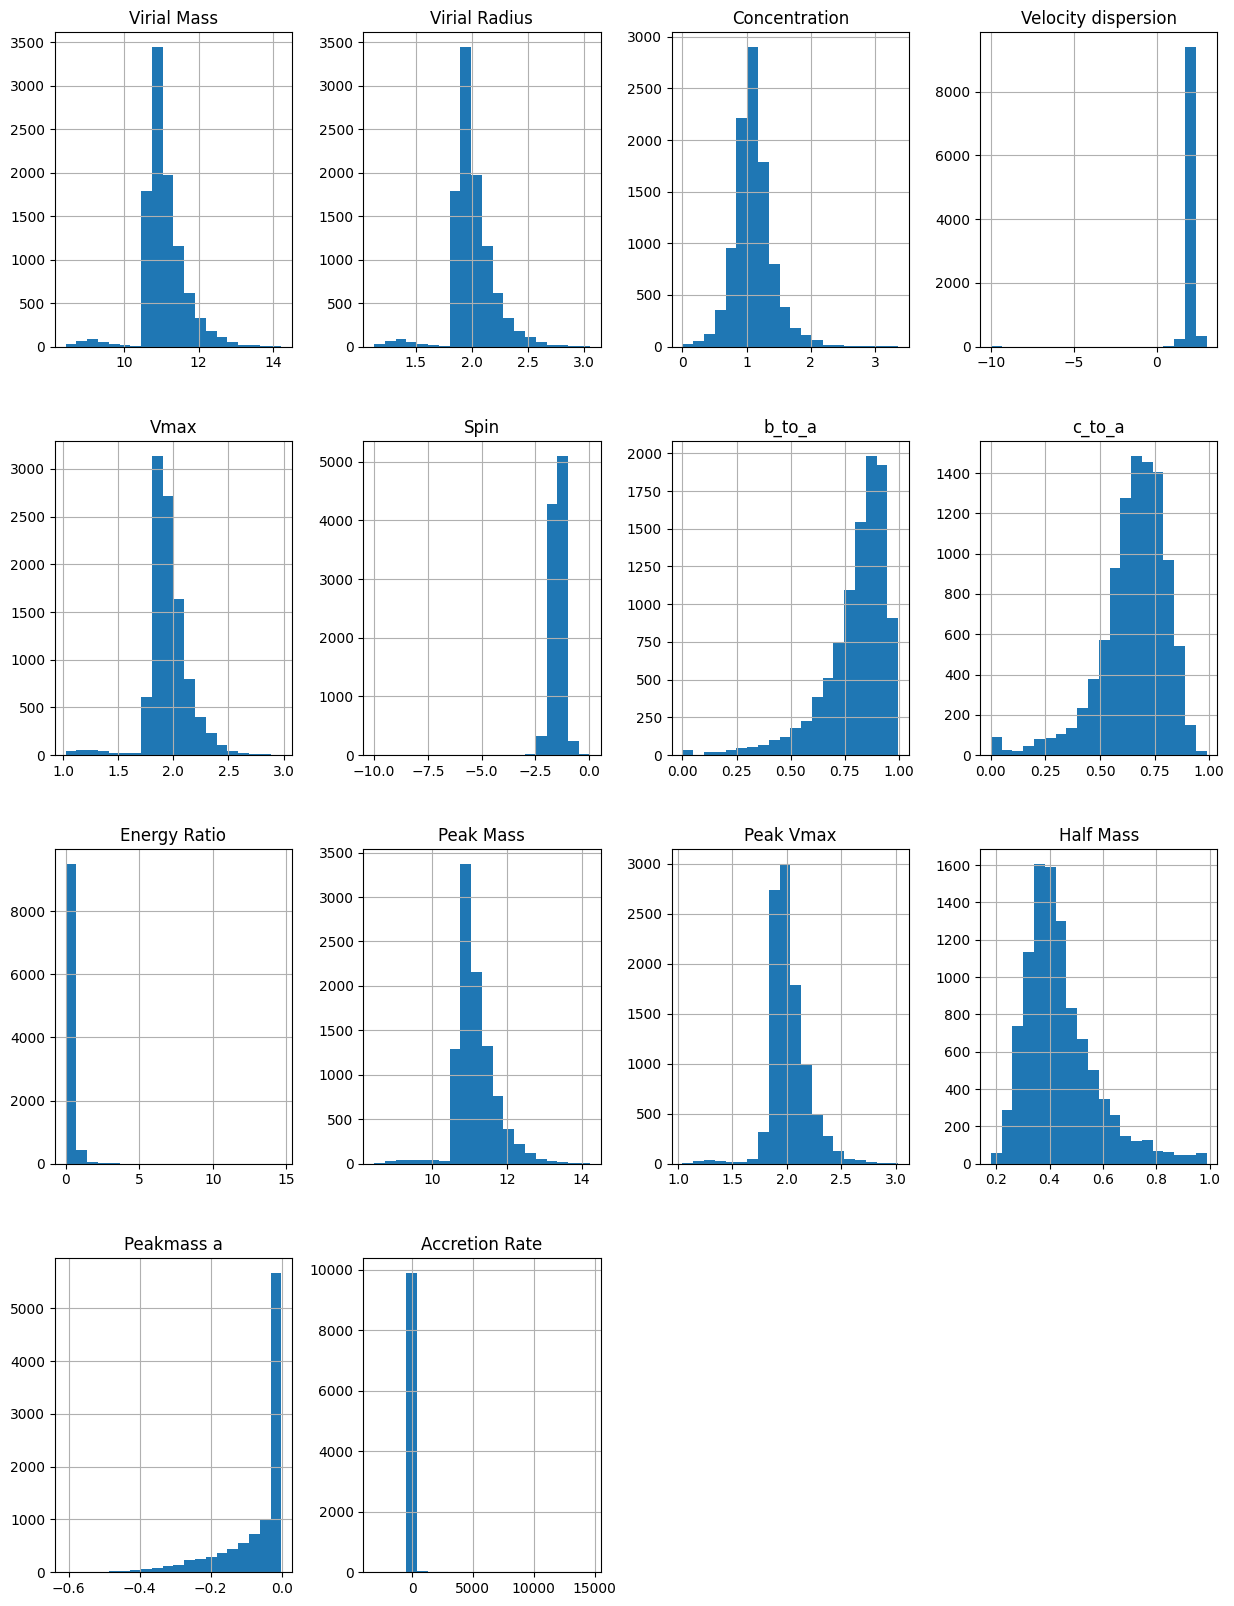

In [ ]:
# Drawing histograms to see the distribution of datas
halo_props.hist(bins=20, figsize=(15, 20))

The histogram plots indicate that some features exhibit uneven distributions. For instance, features like virial mass and virial radius start with the highest values and lack a distinct peak. In contrast, other features like c_to_a and halfmass display well-defined peaks. Therefore, feature scaling is necessary.

## **DATA PREPROCESSING**

**1. Splitting dataset into training and test set**

Before applying feature scaling, it is essential to divide the dataset into training and test sets. This step is crucial for later evaluating the efficiency of our model and ensuring it performs well on unseen data.

In [ ]:
# Lets split randomly with 20% in each
# Use random state with some integer to always have the same random numbers
train, test = train_test_split(halo_props, test_size=0.2, random_state=42)

In [ ]:
train.shape

(8000, 14)

In [ ]:
test.shape

In [ ]:
# Doing stratified split to have the same amount of proportions of features in both sets.
cat_per_dex = 2.0
mass_band = np.floor((virial_mass - virial_mass.min())*cat_per_dex)

split = StratifiedShuffleSplit(n_splits = 1, test_size = 0.2, random_state = 34)
for train_index, test_index in split.split(halo_props, mass_band):
  strat_train = halo_props.loc[train_index]
  strat_test = halo_props.loc[test_index]

In [ ]:
strat_test

In [ ]:
#Copy the dataset by using this .copy()
halo_props_train_set = strat_train.copy()

**2. MISSING VALUES**



In [ ]:
# Handling Missing values
halo_props_train_set.isnull().sum()

,0
Virial Mass,0
Virial Radius,0
Concentration,0
Velocity dispersion,0
Vmax,0
Spin,0
b_to_a,0
c_to_a,0
Energy Ratio,0
Peak Mass,0


**3. CORRELATIONS IN THE DATA**

Now, let's examine the correlation between concentration and other features. This analysis will help us understand how concentration is related to other variables, providing insights on how these features can be used to predict concentration.

In [ ]:
corr_matrix = halo_props_train_set.corr()
print(corr_matrix['Concentration'].sort_values())

Half Mass             -0.598035
Peakmass a            -0.484970
Spin                  -0.268629
Energy Ratio          -0.154940
Virial Radius         -0.145658
Virial Mass           -0.145657
Accretion Rate        -0.093040
Peak Mass             -0.023446
Velocity dispersion    0.006967
Vmax                   0.088893
Peak Vmax              0.139369
b_to_a                 0.404984
c_to_a                 0.473167
Concentration          1.000000
Name: Concentration, dtype: float64


From above, it is clear that 'Half Mass' & 'Peakmass a' has the highest anti-correlation whereas 'b to a' & 'c to a' has positive correlation with concentration.

array([[<Axes: xlabel='Concentration', ylabel='Concentration'>,
        <Axes: xlabel='Peakmass a', ylabel='Concentration'>,
        <Axes: xlabel='Half Mass', ylabel='Concentration'>,
        <Axes: xlabel='b_to_a', ylabel='Concentration'>,
        <Axes: xlabel='c_to_a', ylabel='Concentration'>],
       [<Axes: xlabel='Concentration', ylabel='Peakmass a'>,
        <Axes: xlabel='Peakmass a', ylabel='Peakmass a'>,
        <Axes: xlabel='Half Mass', ylabel='Peakmass a'>,
        <Axes: xlabel='b_to_a', ylabel='Peakmass a'>,
        <Axes: xlabel='c_to_a', ylabel='Peakmass a'>],
       [<Axes: xlabel='Concentration', ylabel='Half Mass'>,
        <Axes: xlabel='Peakmass a', ylabel='Half Mass'>,
        <Axes: xlabel='Half Mass', ylabel='Half Mass'>,
        <Axes: xlabel='b_to_a', ylabel='Half Mass'>,
        <Axes: xlabel='c_to_a', ylabel='Half Mass'>],
       [<Axes: xlabel='Concentration', ylabel='b_to_a'>,
        <Axes: xlabel='Peakmass a', ylabel='b_to_a'>,
        <Axes: xlabel='H

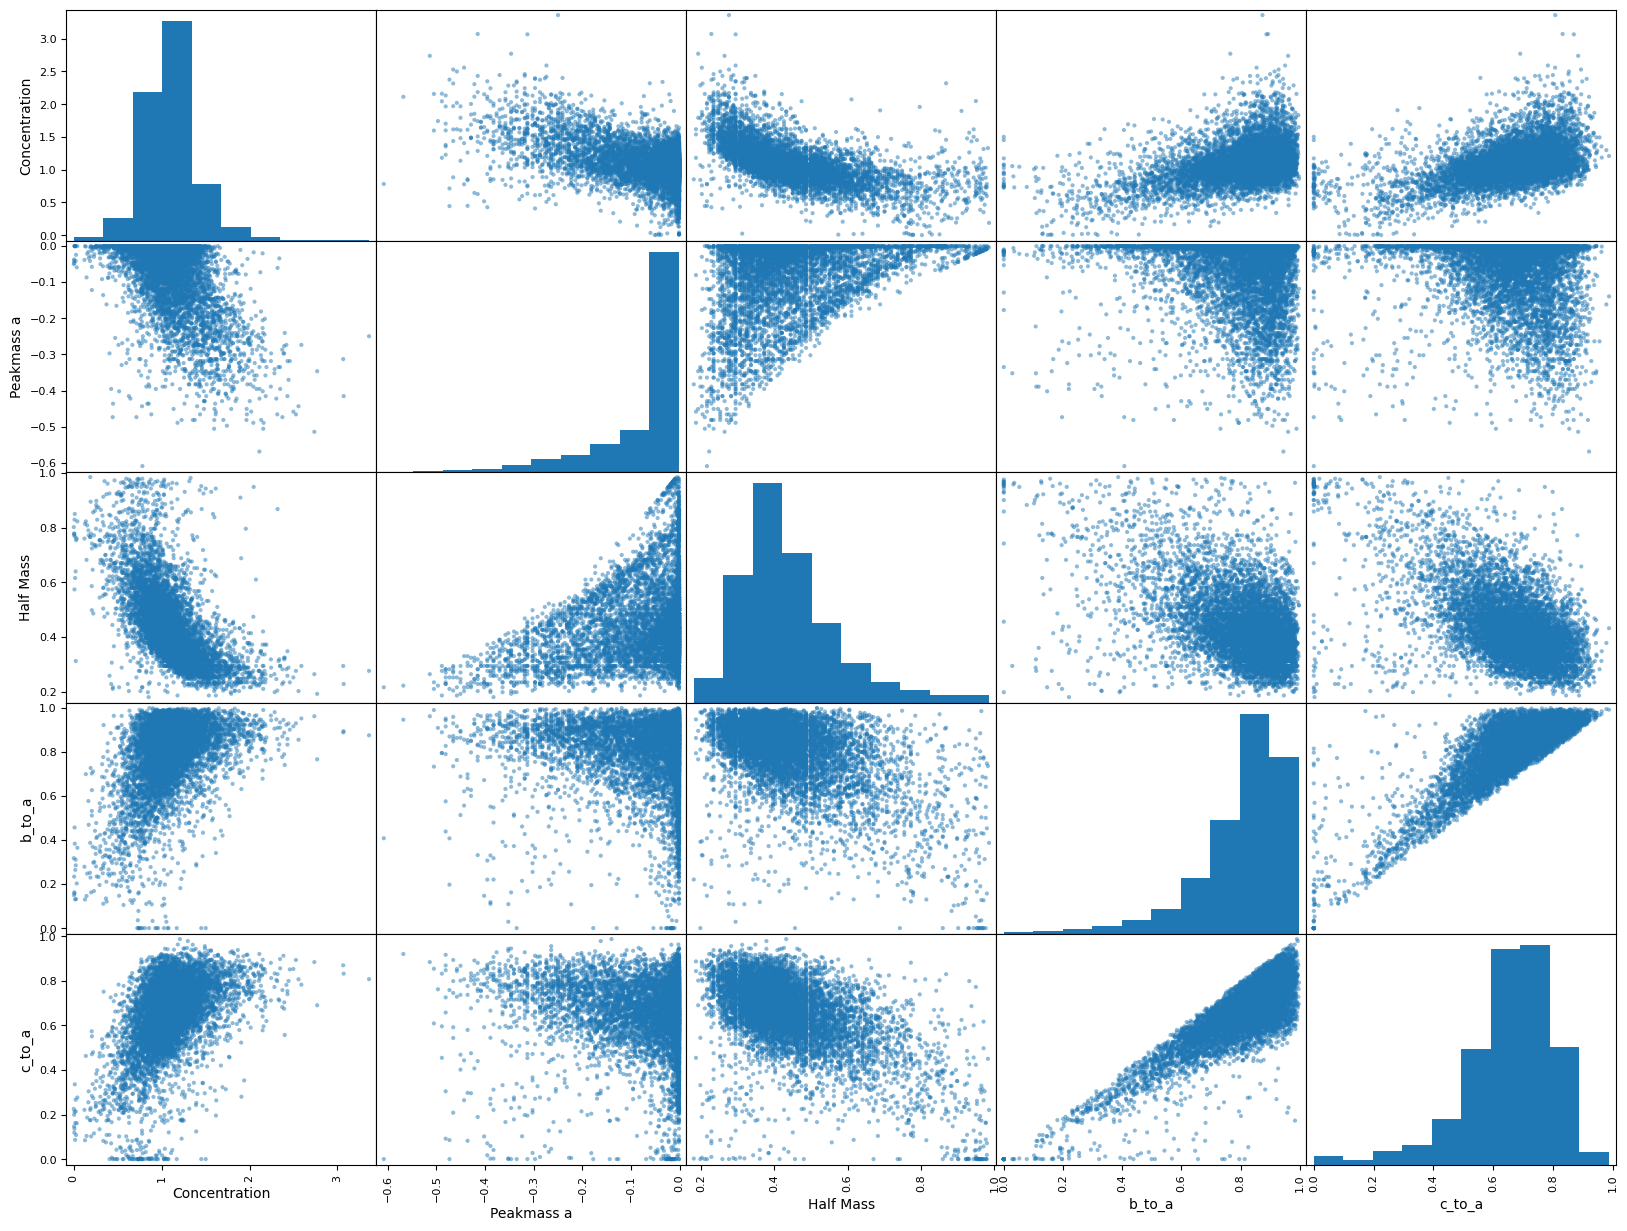

In [ ]:
attributes = ['Concentration', 'Peakmass a', 'Half Mass', 'b_to_a', 'c_to_a']
pd.plotting.scatter_matrix(halo_props_train_set[attributes], figsize=(20,15))

<Axes: xlabel='Half Mass', ylabel='Concentration'>

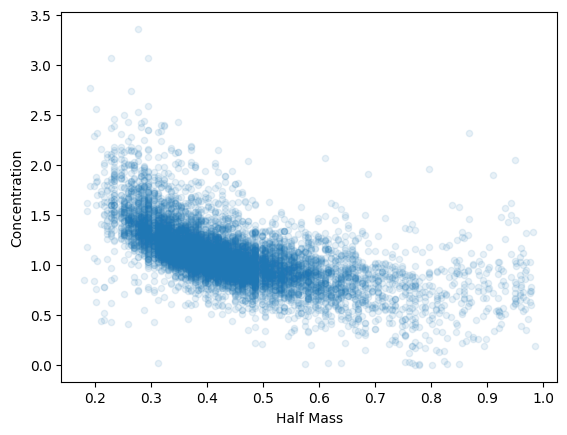

In [ ]:
# Plot for highest correlation
halo_props_train_set.plot(kind='scatter', x='Half Mass', y='Concentration', alpha=0.1)

Our primary goal is to identify the feature that has the highest correlation with concentration. Therefore, we are splitting the training set into two parts: one with concentration and one without concentration.

In [ ]:
halos_target = halo_props_train_set['Concentration'].copy()  # Separate dataset only with concentration
halos_data = halo_props_train_set.drop('Concentration', axis=1)  # Separate dataset without concentration

Based on the histograms, features with a clear peak should use a standard scaler (mean=0, standard deviation=1). Features that decrease monotonically should use min-max scaling (min=0, max=1). Some features are already scaled and do not need rescaling.

In [ ]:
# Attributes for min_max scaling
minmax_attribs = ['Virial Radius', 'Virial Mass', 'Peakmass a', 'Peak Mass']
# Attributes for standard scaling
scaler_attribs = ['Peak Vmax', 'Vmax', 'Spin', 'Half Mass', 'Energy Ratio', 'c_to_a', 'b_to_a']


**CREATING A PIPELINE**

In [ ]:
# Set Pipeline

imputer = SimpleImputer(strategy='median')

# Pipeline for min-maxing
min_max_transformer = Pipeline(steps=[
    ('imputer', imputer),
    ('min-max', MinMaxScaler())
])

# Pipeline for Standardizing
standard_transformer = Pipeline(steps=[
    ('imputer', imputer),
    ('standard', StandardScaler())
])
# Combine Transformers using ColumnTransformer
preprocessor = ColumnTransformer(transformers = [
    ('Minmax Scaling', min_max_transformer, minmax_attribs),
    ('Standard Scaling', standard_transformer, scaler_attribs)
],

    remainder='passthrough')

# Create the Final pipeline
pipeline_lr = Pipeline(steps=[
    ('preprocessor', preprocessor),  # Transformers list
    ('Linear regression model', lr := LinearRegression())    # Estimator
])

pipeline_dt = Pipeline(steps=[
    ('preprocessor', preprocessor),  # Transformers list
    ('Decision Tree model', dt := DecisionTreeRegressor())  # Estimator
])

pipeline_svm = Pipeline(steps=[
    ('preprocessor', preprocessor),    # Transformers list
    ('Support Vector model', svr := SVR())    # Estimator
])

# Pipeline with all models
pipeline_all = [pipeline_lr, pipeline_dt, pipeline_svm]


In [ ]:
# Preprocessed dataset without using any models
halo_scaled = preprocessor.fit_transform(halos_data)

##**TRAINING THE MODELS**

In [ ]:
# Defining a function to plot our ML models
def plot(x, y, x_label, y_label, title):
  plt.plot(x, y, '.');
  plt.plot(y, y);
  plt.xlabel(x_label);
  plt.ylabel(y_label)
  plt.title(title)


Let's test the three selected models to determine which one performs the best.

**1. LINEAR REGRESSION**

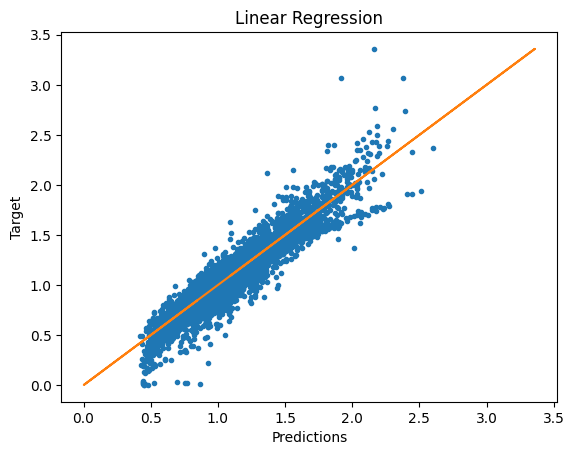

In [ ]:
model1 = pipeline_all[0].fit(halos_data, halos_target)
m1_predict = model1.predict(halos_data)
plot(m1_predict, halos_target, 'Predictions', 'Target', 'Linear Regression')

**2. DECISION TREE REGRESSION**

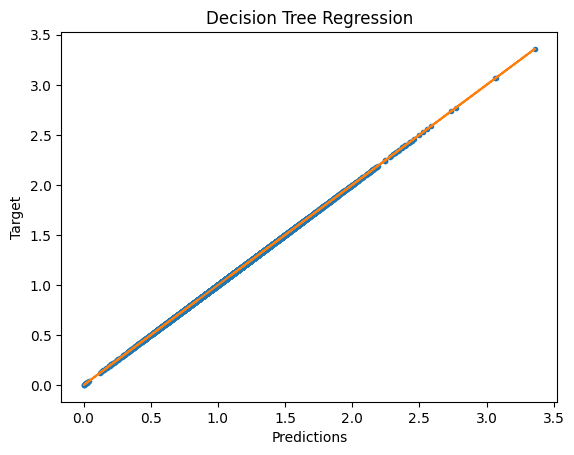

In [ ]:
model2 = pipeline_all[1].fit(halos_data, halos_target)
m2_predict = model2.predict(halos_data)

plot(m2_predict, halos_target, 'Predictions', 'Target', 'Decision Tree Regression')

**3. SUPPORT VECTOR REGRESSION**

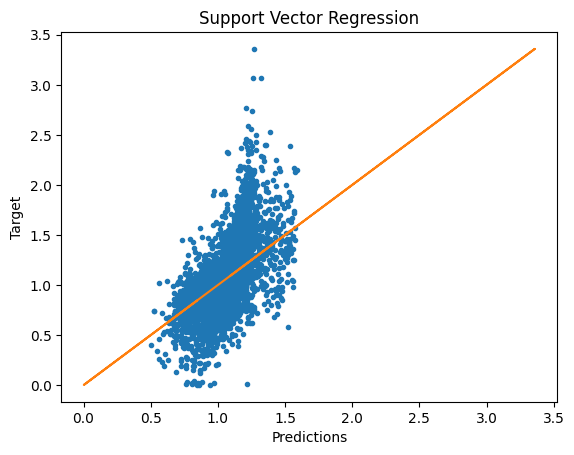

In [ ]:
model3 = pipeline_all[2].fit(halos_data, halos_target)
m3_predict = model3.predict(halos_data)
plot(m3_predict, halos_target, 'Predictions', 'Target', 'Support Vector Regression')

Among all the models, linear regression has perfomed the best so far. The Decision tree model overfits, while Support Vector model performs poorly. Now let's have a look at their rmse values and cross validation scores.

In [ ]:
# Predicting the RMSE values for the models
ms_predict = {
    'Linear Regression':m1_predict,
    'Decision Tree Regression': m2_predict,
    'Support Vector Regression': m3_predict
}

for name, predictions in ms_predict.items():
  ms_mse = mean_squared_error(halos_target, predictions)
  ms_rmse = np.sqrt(ms_mse)
  print(f'{name} - {ms_rmse}')

Linear Regression - 0.10655641810133716
Decision Tree Regression - 0.0
Support Vector Regression - 0.24446509726441726


In [ ]:
#Define function for validation output
def display_scores(scores):
    print("Scores:", np.sqrt(-scores).mean())
    print("Mean:", scores.mean())
    print("Standard Deviation:", scores.std())

In [ ]:
# Cross Validation of linear regression
scores = cross_val_score(lr, halo_scaled, halos_target, scoring="neg_mean_squared_error", cv=10)
print('\nLinear Regression:')
display_scores(scores)

# Cross Validation of decision tree
scores = cross_val_score(dt, halo_scaled, halos_target, scoring="neg_mean_squared_error", cv=10)
print('\nDecision Tree Regression:')
display_scores(scores)

# Cross Validation of Support vector
scores = cross_val_score(svr, halo_scaled, halos_target, scoring="neg_mean_squared_error", cv=10)
print('\nSupport Vector Regression:')
display_scores(scores)



Linear Regression:
Scores: 0.10679615620305602
Mean: -0.011422702969661112
Standard Deviation: 0.0008781178384723112

Decision Tree Regression:
Scores: 0.2009502664412434
Mean: -0.040395062601928995
Standard Deviation: 0.0015131680675423513

Support Vector Regression:
Scores: 0.2469989338938395
Mean: -0.06108791412747768
Standard Deviation: 0.004382536275515626


It's clear that the linear model performed the best. Let's now tune its hyperparameters using GridSearchCV to see if we can improve the model further.

##**FINE-TUNING THE MODEL**

In [ ]:
# Create an instance of the LinearRegression class
model = LinearRegression()

# Now call get_params on the model instance
params = model.get_params(deep=True)

# Print the parameters
print(params)

{'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'positive': False}


In [ ]:
# Define the parameter distribution for hyperparameter tuning
param_grid = {
    'copy_X': [True, False],
    'fit_intercept': [True, False],
    'n_jobs': [None, -1],
    'positive': [True, False]
}

# Create a customized GridSearchCV object
grid_search = GridSearchCV(lr, param_grid, cv=5, scoring='neg_mean_squared_error')

# Fit the GridSearchCV object to the training data
grid = grid_search.fit(halo_scaled, halos_target)
grid

GridSearchCV(cv=5, estimator=LinearRegression(),
             param_grid={'copy_X': [True, False],
                         'fit_intercept': [True, False], 'n_jobs': [None, -1],
                         'positive': [True, False]},
             scoring='neg_mean_squared_error')

In [ ]:
# Print the best hyperparameters found
lr_params = grid_search.best_params_
lr_b_model = grid_search.best_estimator_


In [ ]:
# Make predictions on the training set
lr_b_pred = lr_b_model.predict(halo_scaled)

# Print the best rmse values
ms_mse = mean_squared_error(halos_target, lr_b_pred)
ms_rmse = np.sqrt(ms_mse)
print(f'best rmse of linear regression: {ms_rmse}')

best rmse of linear regression: 0.10655641810133716


## **FINAL EVALUATION ON THE TEST SET**

In [ ]:
#Evaluate the system in the test set
lr_b_model = grid_search.best_estimator_

X_test = strat_test.drop('Concentration', axis=1)
y_test = strat_test['Concentration'].copy()

X_test_prepared = preprocessor.transform(X_test)

final_predictions = lr_b_model.predict(X_test_prepared)

final_mse = mean_squared_error(y_test, final_predictions)
final_rmse = np.sqrt(final_mse)
final_rmse

0.10365159258144935

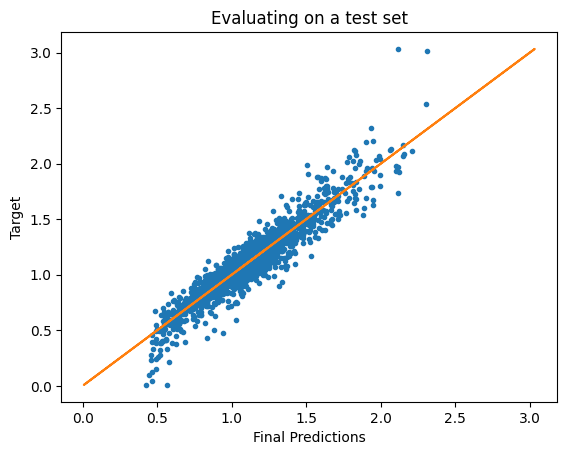

In [ ]:
plot(final_predictions, y_test, 'Final Predictions', 'Target', 'Evaluating on a test set')

It works great.... From this, we can understand that linear regression works best on both training and test sets.